# Week 2 - Goal Programming

In [2]:
import numpy as np
import pandas as pd
from pulp import *

## Cost & Benefit Tradeoff
Linear Programming problem
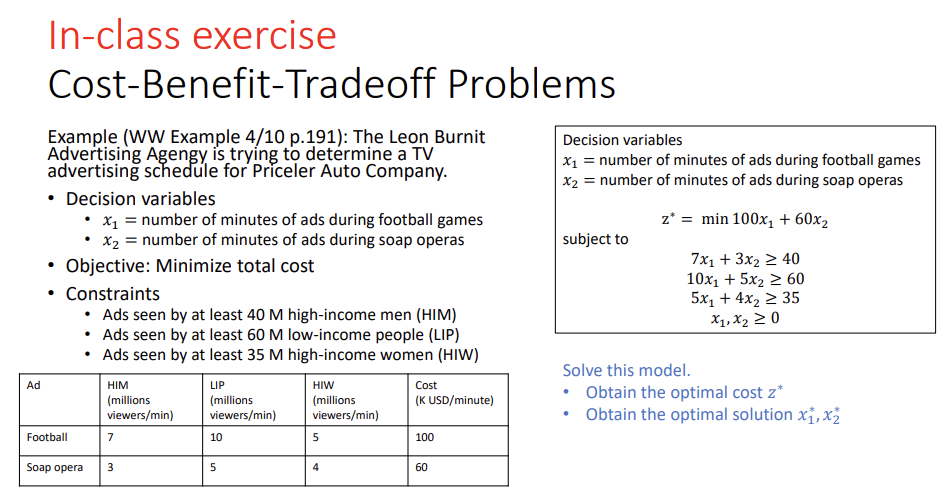

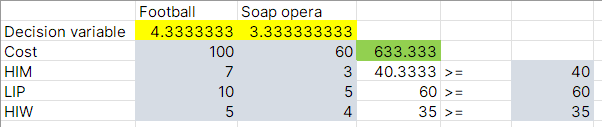

In [18]:
# Decision variables
decision_vars = LpVariable.matrix('x', range(1,3), lowBound=0)

# Problem
prob = LpProblem('CostBenefitTradeoff', LpMinimize)

# Objective function
costs = np.array([100, 60])
prob += lpSum(costs * decision_vars)

# Benefit constraints
benefits = np.array([[7, 3],
                     [10,5],
                     [5,4]])
reaches = np.array([40, 60, 35])

for i, benefit in enumerate(benefits):
    prob += lpSum(decision_vars * benefit) >= reaches[i], f"Reach constraint {i+1}"
    
prob

CostBenefitTradeoff:
MINIMIZE
100*x_1 + 60*x_2 + 0
SUBJECT TO
Reach_constraint_1: 7 x_1 + 3 x_2 >= 40

Reach_constraint_2: 10 x_1 + 5 x_2 >= 60

Reach_constraint_3: 5 x_1 + 4 x_2 >= 35

VARIABLES
x_1 Continuous
x_2 Continuous

In [19]:
prob.solve()
print(f"Status: {LpStatus[prob.status]}")
print(f"Objective value: {prob.objective.value()}")
for v in prob.variables():
    print(f"{v.name} = {v.value()}")

Status: Optimal
Objective value: 633.3328
x_1 = 4.33333
x_2 = 3.33333


## Goal Programming

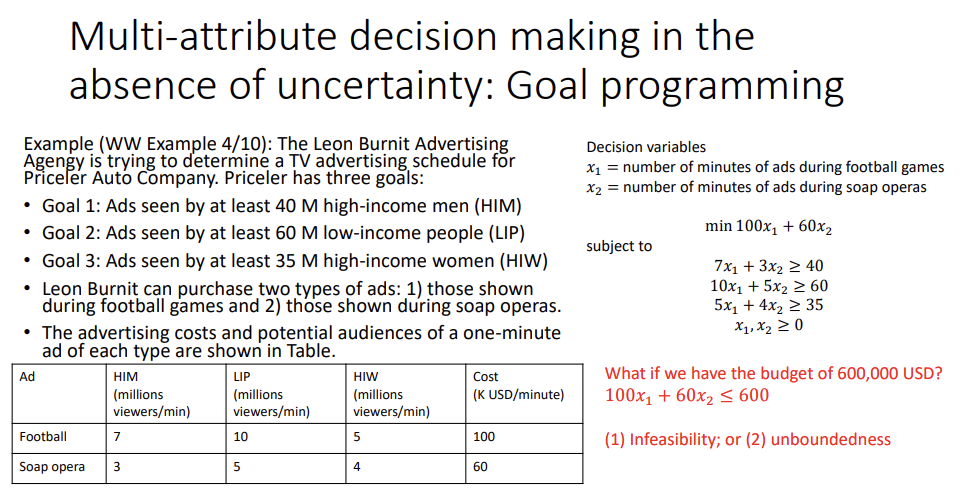

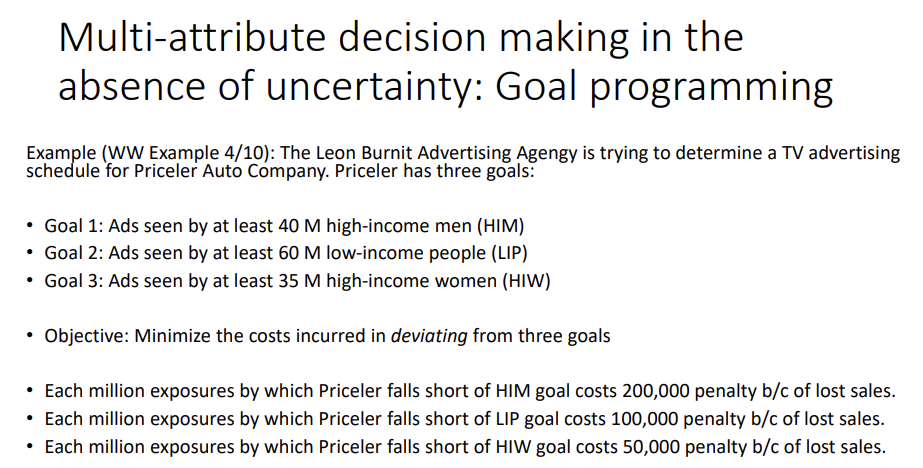

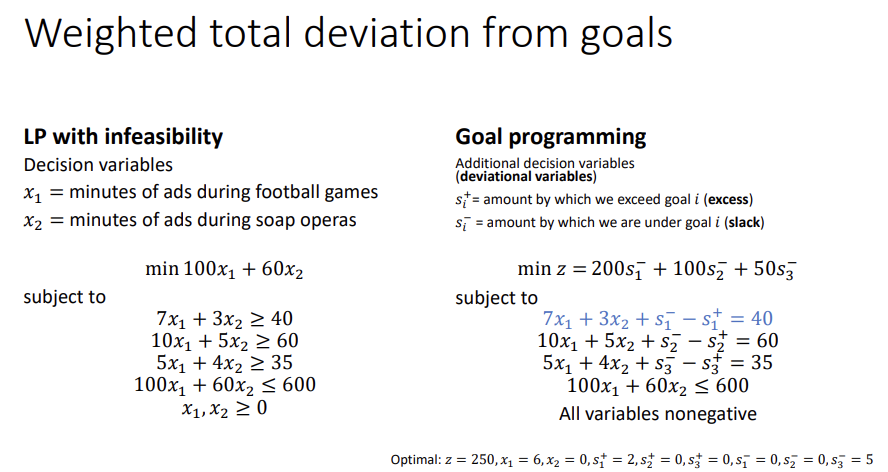


### Using Excel's Solver
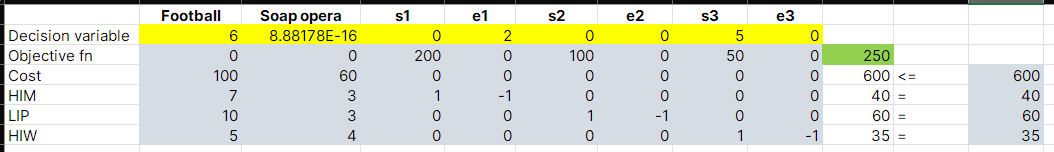

In [28]:
# for each activity, there are 3 decision varalbes x, slack, excess
variables = np.array([LpVariable('x_1', lowBound=0),
             LpVariable('x_2', lowBound=0),
             LpVariable('slack_1', lowBound=0),
             LpVariable('excess_1', lowBound=0),
             LpVariable('slack_2', lowBound=0),
             LpVariable('excess_2', lowBound=0),
             LpVariable('slack_3', lowBound=0),
             LpVariable('excess_3', lowBound=0)])
coef = np.array([0, 0, 200, 0, 100, 0, 50, 0])

prob = LpProblem('GoalProgramming', LpMinimize)
prob += lpSum(coef * variables)

# Cost from previous problem has become a hard constraint
# 100*x1 + 60*x2 <= 600
costs = np.array([100, 60, 0, 0, 0, 0, 0, 0])
prob += lpSum(costs * variables) <= 600, "Cost Constraint"

benefits = np.array([
    [7,  3,  1, -1,  0,  0,  0,  0],
    [10, 3,  0,  0,  1, -1,  0,  0],
    [5,  4,  0,  0,  0,  0,  1, -1]
])
benefit_rhs = np.array([40, 60, 35])
for i, rhs in enumerate(benefit_rhs):
    prob += lpSum(benefits[i] * variables) == rhs, f"Benefit Constraint {i+1}"

prob

GoalProgramming:
MINIMIZE
200*slack_1 + 100*slack_2 + 50*slack_3 + 0
SUBJECT TO
Cost_Constraint: 100 x_1 + 60 x_2 <= 600

Benefit_Constraint_1: - excess_1 + slack_1 + 7 x_1 + 3 x_2 = 40

Benefit_Constraint_2: - excess_2 + slack_2 + 10 x_1 + 3 x_2 = 60

Benefit_Constraint_3: - excess_3 + slack_3 + 5 x_1 + 4 x_2 = 35

VARIABLES
excess_1 Continuous
excess_2 Continuous
excess_3 Continuous
slack_1 Continuous
slack_2 Continuous
slack_3 Continuous
x_1 Continuous
x_2 Continuous

In [29]:
prob.solve()
print(f"Status: {LpStatus[prob.status]}")
print(f"Objective value: {prob.objective.value()}")
for v in prob.variables():
    print(f"{v.name} = {v.value()}")

Status: Optimal
Objective value: 250.0
excess_1 = 2.0
excess_2 = 0.0
excess_3 = 0.0
slack_1 = 0.0
slack_2 = 0.0
slack_3 = 5.0
x_1 = 6.0
x_2 = 0.0
